In [110]:
# all imports
%matplotlib inline
# from numpy
from numpy import log
import numpy as np
from numpy.linalg import inv
from numpy.linalg import det

# from scipy
import scipy as sc

# from sklearn
import sklearn
from sklearn.metrics import precision_recall_curve
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets, linear_model
from sklearn.cross_validation import KFold    
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split #  this is used for cross validation 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
#LOGESTIC REGRESSION
from sklearn.linear_model import LogisticRegression
# THIS IS FOR THE DISPLAY
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel

# from pandas
import pandas as pd

#from matplot
import matplotlib.pyplot as plt
import matplotlib 

# regular python imports
import math
from math import exp
import collections # this is used to perform the collection  based sorting  and unique element identification
from functools import partial # this is to accomdate partials
import random
import os
import re

In [111]:
class TestMetrics:
    
    def setData(self,y_test,y_pred_class):
            self.y_test = y_test
            self.y_pred_class = y_pred_class
    def getMatrics(self):
        # save confusion matrix and slice into four pieces
        confusion = metrics.confusion_matrix(self.y_test, self.y_pred_class)
#       print "confusion matrix:",confusion
        TP = confusion[1, 1]
        TN = confusion[0, 0]
        FP = confusion[0, 1]
        FN = confusion[1, 0]
        if math.isnan(TP):
            print "tp is nan"
            TP = 0
        if math.isnan(TN):
            print "tn is nan"
            TN = 0
        if math.isnan(FP):
            print "fp is nan"
            FP = 0
        if math.isnan(FN):
            print " is nan"
            FN = 0       

        #Classification Accuracy: Overall, how often is the classifier correct?
        #Classification_Accuracy = (TP + TN) / float(TP + TN + FP + FN)
        Classification_Accuracy = metrics.accuracy_score(self.y_test, self.y_pred_class)
        #print "#Classification Accuracy:\t",Classification_Accuracy
       
        #Classification Error: Overall, how often is the classifier incorrect?
        #Classification_Error = (FP + FN) / float(TP + TN + FP + FN)
        Classification_Error =  1 - metrics.accuracy_score(self.y_test, self.y_pred_class)
        
        #Sensitivity:
        Sensitivity = TP / float(TP + FN)
        #print "#Sensitivity:\t",Sensitivity

        Specificity = TN / float(TN + FP) 
        #print "#Specificity:\t",Specificity
        False_Positive_Rate = FP / float(TN + FP)
        #Precision = TP / float(TP + FP)
        Precision = metrics.precision_score(self.y_test, self.y_pred_class)
        return TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision
#test        
# tm  = TestMetrics()
# tm.setData(Y,Y)
# tm.getMatrics()

In [112]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:,:]  # we only take the first two features.
Y = iris.target

print X.shape
print Y.shape

(150L, 4L)
(150L,)


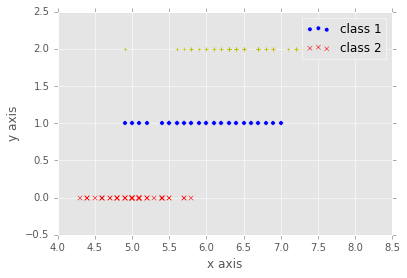

In [113]:
fltr = lambda classification :where(Y == classification)
pos = fltr(1)
#pos = where(Y == 1)
#print "pos",pos
neg = where(Y == 0)

thirdClass = where(Y == 2)

scatter(X[pos, 0], Y[pos], marker='o', c='b')
scatter(X[neg, 0], Y[neg], marker='x', c='r')
scatter(X[thirdClass, 0], Y[thirdClass], marker='+', c='y')
xlabel('x axis')
ylabel('y axis')
legend(['class 1', 'class 2'])
show()

# Arvind Notes
## there are a set of rules and assumption that I am making 
-  the X is a col vector and Y is a list
-  I am using polynomial feature to create a matrix with appending one . For now my assumpition is that the degree is to be mainitained to is one


### LOGESTIC REGRESSION  FOR TWO-CLASS DISCRIMINATION


In [114]:
sigmoid = lambda inputVar: 1.0/(exp(-1.0 *inputVar)+1.0) #multiplying by -1 to change the axis derection ;SIGMOID THAT IS BEEN DEFINED | THIS RETURNS A SCALAR

model = lambda thetaVal ,Xval : sigmoid(float(np.dot(thetaVal.T,Xval)))

costFunction = lambda thetaVal,ZVal,YVal : model(thetaVal,ZVal)- YVal

numberOfClasses = lambda yVal : set(yVal)

def sumOfCostfunction(thetaVal,ZVal,YVal):
    returnVal = []
    for index,singleX in enumerate(ZVal):
        cs =costFunction(thetaVal,np.array([singleX]).T,YVal[index])
        #print cs
        #mul = cs*np.array([singleX])
        mul = cs*singleX
        #print mul
        returnVal.append(mul)
    return np.array([np.sum(returnVal,axis=0)]) 

def discriminent(x):
    #print "discriminent",x
    if (x>0.5) :
        return 1
    else :
        return 0
    


#print sigmoid(11) # this is to test
class LogesticRegressionSelf:
    
    def setup(self):
        #defining initial parameter
        self.alpha=0.0001
        self.numIterations=4000
        self.degree = 1
        
        #print self.xlist

        self.xrow,self.xcol = self.xlist.shape # getting number of rows and cols in x matrix
        self.Z = PolynomialFeatures(self.degree).fit_transform(self.xlist) #Creating the z matrix
        self.zrow,self.zcol = self.Z.shape # getting the rows an cols for the z matrix

        #print "z-matrix",self.Z
        #print "zrow-matrix,zcol",self.zrow,self.zcol
    
    def fit(self,xlist,ylist):
        self.xlist  = xlist
        self.ylist  = ylist
        self.setup()
        self.theta = self.gradient_descent()
        #print self.theta
    
    def predict(self,getList):
        #print "you are in the predict list"
        Z = PolynomialFeatures(self.degree).fit_transform(getList) #Creating the z matrix
        #print Z
        returnval = [discriminent(model(self.theta,np.array([a]).T)) for a in Z]
        #print returnval
        return returnval
    
    def gradient_descent(self):
        alpha = self.alpha
        numIterations = self.numIterations
        x = self.Z
        y = self.ylist
        m = self.zrow # number of samples
        #print m
        theta = (np.array([np.ones(self.zcol)]).T)/1000
#         print "theta",theta
#         print sumOfCostfunction(theta,x,y)
#         print theta - alpha*sumOfCostfunction(theta,x,y).T
        #print [np.array([a]).T for a in x]
        
        for iter in range(0, numIterations):
            theta =  theta - alpha*sumOfCostfunction(theta,x,y).T  # update
        return theta
    
X_1D = X[:100,:1]# this is to take one feature and first 100 data sets
Y_1D = Y [:100] # this is to take 1st 100 data sets

# testClass = LogesticRegressionSelf()
# testClass.fit(X_1D,Y_1D)
# ld_predicted_Y_values = testClass.predict(X_1D)
# ld_matricsTotal =[]
# ld_tm  = TestMetrics()
# ld_tm.setData(Y_1D,ld_predicted_Y_values)
# TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision =  ld_tm.getMatrics()
# print ld_tm.getMatrics()
# ld_matricsTotal.append({"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Accuracy":Classification_Accuracy,"Error":Classification_Error,"Sensitivity":Sensitivity,"Specificity":Specificity,"False_Positive_Rate":False_Positive_Rate,"Precision":Precision})
# print pd.DataFrame(ld_matricsTotal)

self Implementation
   Accuracy  Error  FN  FP  False_Positive_Rate  Precision  Sensitivity  \
0       0.2    0.8   0   8                 1.00   0.200000          1.0   
1       0.8    0.2   1   1                 0.20   0.800000          0.8   
2       0.9    0.1   0   1                 0.25   0.857143          1.0   
3       0.6    0.4   0   4                 0.80   0.555556          1.0   
4       0.7    0.3   0   3                 0.50   0.571429          1.0   

   Specificity  TN  TP  
0         0.00   0   2  
1         0.80   4   4  
2         0.75   3   6  
3         0.20   1   5  
4         0.50   3   4  
sklearn
   Accuracy  Error  FN  FP  False_Positive_Rate  Precision  Sensitivity  \
0       0.3    0.7   0   7             0.875000   0.222222          1.0   
1       0.8    0.2   2   0             0.000000   1.000000          0.6   
2       1.0    0.0   0   0             0.000000   1.000000          1.0   
3       0.9    0.1   0   1             0.200000   0.833333          1.0

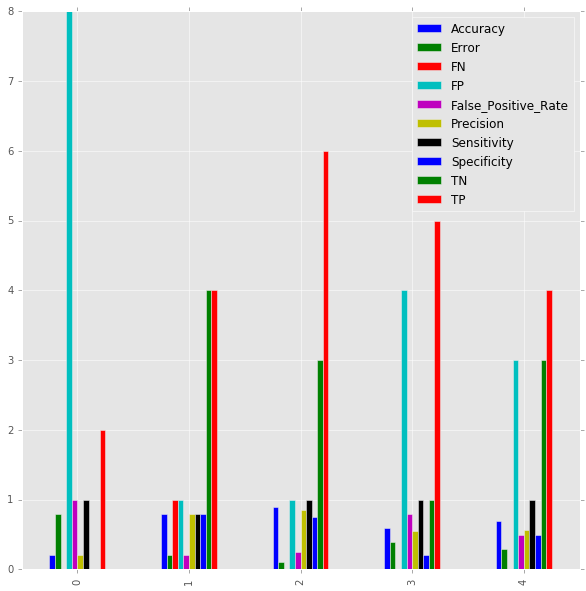

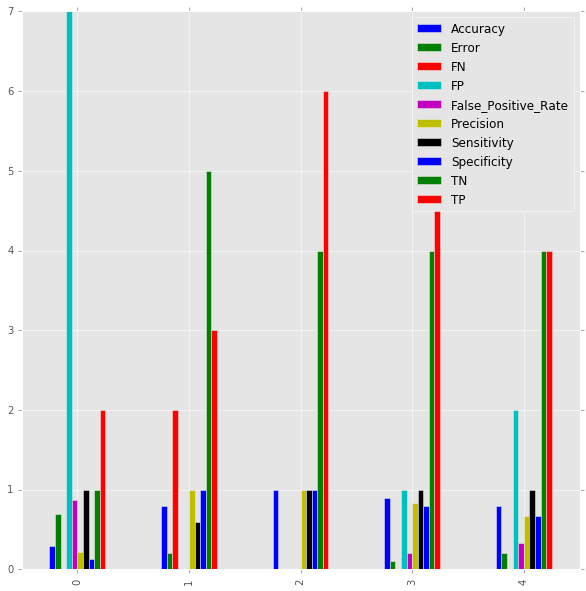

In [115]:
X_1D = X[:100,:1]# this is to take one feature and first 100 data sets
Y_1D = Y [:100] # this is to take 1st 100 data sets
'''  tip and notes
    x row vector where your output is [[],[],[]]
    y is list []
'''

matricsTotal = []
ld_matricsTotal = []
kf = sklearn.cross_validation.KFold(n=len(Y_1D), n_folds=10, shuffle=True,random_state=5)
for train_index, test_index in kf:
    X_train, X_test =np.array([list(X_1D[a]) for a  in train_index]),np.array([list(X_1D[a]) for a  in test_index])
    Y_train, Y_test = [Y_1D[a] for a  in train_index],[Y_1D[a] for a  in test_index]
    
    #print X_train
    grad =  LogesticRegressionSelf()
    grad.fit(X_train,Y_train)
    predicted_Y_values = grad.predict(X_test)
    #self
    
    tm  = TestMetrics()
    tm.setData(Y_test,predicted_Y_values)
    TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision =  tm.getMatrics()
    matricsTotal.append({"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Accuracy":Classification_Accuracy,"Error":Classification_Error,"Sensitivity":Sensitivity,"Specificity":Specificity,"False_Positive_Rate":False_Positive_Rate,"Precision":Precision})
    
    ### sklearn test 
    ld_grad =   LogisticRegression()
    ld_grad.fit(X_train,Y_train)
    ld_predicted_Y_values = ld_grad.predict(X_test)
    
    ld_tm  = TestMetrics()
    ld_tm.setData(Y_test,ld_predicted_Y_values)
    TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision =  ld_tm.getMatrics()
    ld_matricsTotal.append({"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Accuracy":Classification_Accuracy,"Error":Classification_Error,"Sensitivity":Sensitivity,"Specificity":Specificity,"False_Positive_Rate":False_Positive_Rate,"Precision":Precision})
 
    
    

matplotlib.style.use('ggplot')

print "self Implementation"
df = pd.DataFrame(matricsTotal).head()
#df.plot.figure(figsize=(50,50))
df.plot(kind = 'bar',figsize =(10 ,10),stacked = False)
print df

print "sklearn"
ld_df = pd.DataFrame(ld_matricsTotal).head()
ld_df.plot(kind = 'bar',figsize =(10 ,10),stacked = False)
print ld_df

### LOGESTIC REGRESSION  FOR NON LINEAR COMBINATION OF INPUTS

self Implementation
   Accuracy  Error  FN  FP  False_Positive_Rate  Precision  Sensitivity  \
0         1      0   0   0                    0          1            1   
1         1      0   0   0                    0          1            1   
2         1      0   0   0                    0          1            1   
3         1      0   0   0                    0          1            1   
4         1      0   0   0                    0          1            1   

   Specificity  TN  TP  
0            1   8   2  
1            1   5   5  
2            1   4   6  
3            1   5   5  
4            1   6   4  
sklearn
   Accuracy  Error  FN  FP  False_Positive_Rate  Precision  Sensitivity  \
0         1      0   0   0                    0          1            1   
1         1      0   0   0                    0          1            1   
2         1      0   0   0                    0          1            1   
3         1      0   0   0                    0          1            1

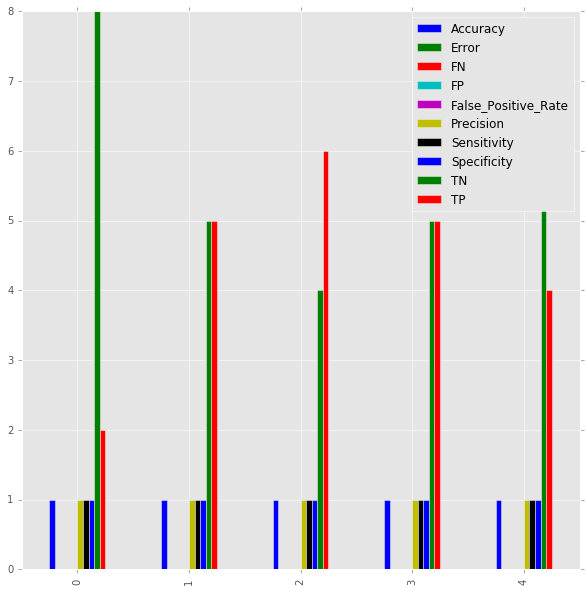

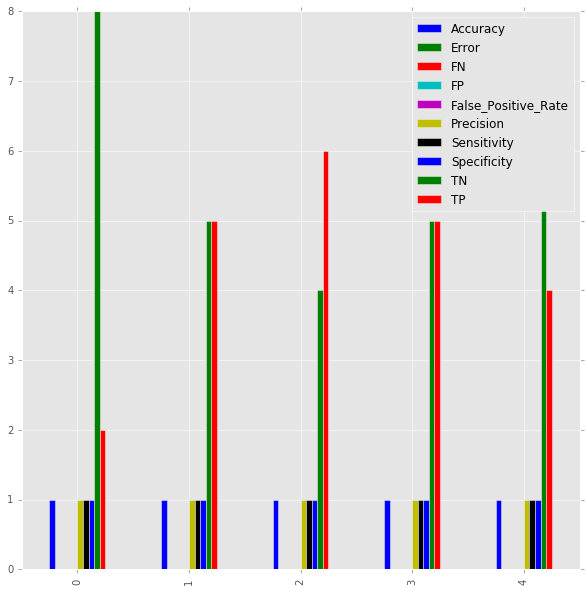

In [116]:
X_1D = X[:100,:]# this is to take all feature and first 100 data sets
Y_1D = Y [:100] # this is to take 1st 100 data sets


matricsTotal = []
ld_matricsTotal = []
kf = sklearn.cross_validation.KFold(n=len(Y_1D), n_folds=10, shuffle=True,random_state=5)
for train_index, test_index in kf:
    X_train, X_test =np.array([list(X_1D[a]) for a  in train_index]),np.array([list(X_1D[a]) for a  in test_index])
    Y_train, Y_test = [Y_1D[a] for a  in train_index],[Y_1D[a] for a  in test_index]
   
    #print X_train
    grad =  LogesticRegressionSelf()     
    grad.fit(X_train,Y_train)
    predicted_Y_values = grad.predict(X_test)
    #self
    
    tm  = TestMetrics()
    tm.setData(Y_test,predicted_Y_values)
    TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision =  tm.getMatrics()
    matricsTotal.append({"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Accuracy":Classification_Accuracy,"Error":Classification_Error,"Sensitivity":Sensitivity,"Specificity":Specificity,"False_Positive_Rate":False_Positive_Rate,"Precision":Precision})
    
    ### sklearn test 
    ld_grad =   LogisticRegression()
    ld_grad.fit(X_train,Y_train)
    ld_predicted_Y_values = ld_grad.predict(X_test)
    
    ld_tm  = TestMetrics()
    ld_tm.setData(Y_test,ld_predicted_Y_values)
    TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision =  ld_tm.getMatrics()
    ld_matricsTotal.append({"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Accuracy":Classification_Accuracy,"Error":Classification_Error,"Sensitivity":Sensitivity,"Specificity":Specificity,"False_Positive_Rate":False_Positive_Rate,"Precision":Precision})
 
    
    

matplotlib.style.use('ggplot')

print "self Implementation"
df = pd.DataFrame(matricsTotal).head()
#df.plot.figure(figsize=(50,50))
df.plot(kind = 'bar',figsize =(10 ,10),stacked = False)
print df

print "sklearn"
ld_df = pd.DataFrame(ld_matricsTotal).head()
ld_df.plot(kind = 'bar',figsize =(10 ,10),stacked = False)
print ld_df

### LOGESTIC REGRESSION  FOR k CLASS DISCRIMINATION

sklearn
   Accuracy     Error  FN  FP  False_Positive_Rate  Precision  Sensitivity  \
0  0.733333  0.266667   0   0                    0   0.738889            1   
1  1.000000  0.000000   0   0                    0   1.000000            1   
2  1.000000  0.000000   0   0                    0   1.000000            1   
3  1.000000  0.000000   0   0                    0   1.000000            1   
4  0.933333  0.066667   0   0                    0   0.944444            1   

   Specificity  TN  TP  
0            1   4   2  
1            1   4   6  
2            1   7   5  
3            1   5   5  
4            1   2   7  


C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Ana

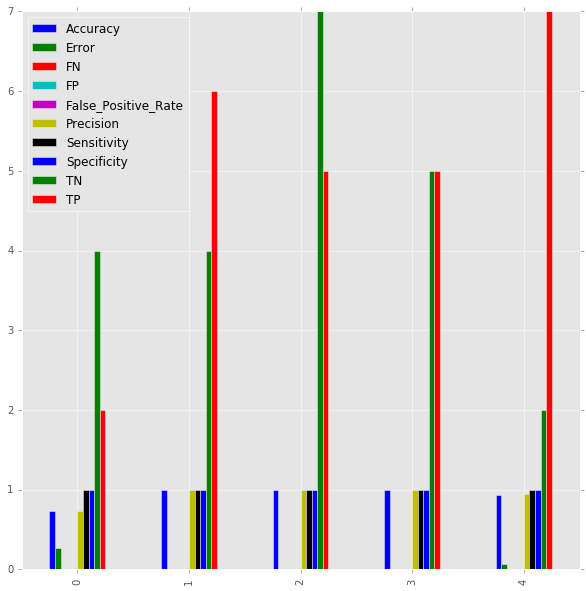

In [117]:
X_1D = X[:,:]# this is to take one feature and first 100 data sets
Y_1D = Y [:] # this is to take 1st 100 data sets


matricsTotal = []
ld_matricsTotal = []
kf = sklearn.cross_validation.KFold(n=len(Y_1D), n_folds=10, shuffle=True,random_state=5)
for train_index, test_index in kf:
    X_train, X_test =[list(X_1D[a]) for a  in train_index],[list(X_1D[a]) for a  in test_index]
    Y_train, Y_test = [Y_1D[a] for a  in train_index],[Y_1D[a] for a  in test_index]

#     grad =  GDA1D2C()
#     grad.fit(X_train,Y_train)
#     predicted_Y_values = grad.predict(X_test)
#     #self
    
#     tm  = TestMetrics()
#     tm.setData(Y_test,predicted_Y_values)
#     TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision =  tm.getMatrics()
#     matricsTotal.append({"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Accuracy":Classification_Accuracy,"Error":Classification_Error,"Sensitivity":Sensitivity,"Specificity":Specificity,"False_Positive_Rate":False_Positive_Rate,"Precision":Precision})
    
    ### sklearn test 
    ld_grad =   LogisticRegression()
    ld_grad.fit(X_train,Y_train)
    ld_predicted_Y_values = ld_grad.predict(X_test)
    
    ld_tm  = TestMetrics()
    ld_tm.setData(Y_test,ld_predicted_Y_values)
    TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision =  ld_tm.getMatrics()
    ld_matricsTotal.append({"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Accuracy":Classification_Accuracy,"Error":Classification_Error,"Sensitivity":Sensitivity,"Specificity":Specificity,"False_Positive_Rate":False_Positive_Rate,"Precision":Precision})
 
    
    

matplotlib.style.use('ggplot')

# print "self Implementation"
# df = pd.DataFrame(matricsTotal).head()
# #df.plot.figure(figsize=(50,50))
# df.plot(kind = 'bar',figsize =(10 ,10),stacked = False)
# print df

print "sklearn"
ld_df = pd.DataFrame(ld_matricsTotal).head()
ld_df.plot(kind = 'bar',figsize =(10 ,10),stacked = False)
print ld_df